<a href="https://colab.research.google.com/github/rocket0l4/Coin-fetch-by-api/blob/main/ethereum__USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using CoinCap API
- Code for Ethereum

In [123]:
import requests
import csv
import json

url = "http://api.coincap.io/v2/assets/ethereum/history?interval=d1"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

json_data = json.loads(response.text.encode('utf8'))

print(response.text)


{"data":[{"priceUsd":"1572.4748293666089164","time":1697587200000,"date":"2023-10-18T00:00:00.000Z"},{"priceUsd":"1559.9731794563154640","time":1697673600000,"date":"2023-10-19T00:00:00.000Z"},{"priceUsd":"1599.5583221194111060","time":1697760000000,"date":"2023-10-20T00:00:00.000Z"},{"priceUsd":"1614.3873565721047008","time":1697846400000,"date":"2023-10-21T00:00:00.000Z"},{"priceUsd":"1635.6248240925478919","time":1697932800000,"date":"2023-10-22T00:00:00.000Z"},{"priceUsd":"1690.0615290961234740","time":1698019200000,"date":"2023-10-23T00:00:00.000Z"},{"priceUsd":"1803.7436171451721088","time":1698105600000,"date":"2023-10-24T00:00:00.000Z"},{"priceUsd":"1789.5693637764443324","time":1698192000000,"date":"2023-10-25T00:00:00.000Z"},{"priceUsd":"1805.8361421280434776","time":1698278400000,"date":"2023-10-26T00:00:00.000Z"},{"priceUsd":"1784.6201554702123418","time":1698364800000,"date":"2023-10-27T00:00:00.000Z"},{"priceUsd":"1788.0622255959847182","time":1698451200000,"date":"2023-1

#Storing the data

In [124]:
ethereum_data = json_data['data']

In [125]:
import pandas as pd
df = pd.DataFrame(ethereum_data)

In [126]:
df

,priceUsd,time,date
0,1572.4748293666089164,1697587200000,2023-10-18T00:00:00.000Z
1,1559.9731794563154640,1697673600000,2023-10-19T00:00:00.000Z
2,1599.5583221194111060,1697760000000,2023-10-20T00:00:00.000Z
3,1614.3873565721047008,1697846400000,2023-10-21T00:00:00.000Z
4,1635.6248240925478919,1697932800000,2023-10-22T00:00:00.000Z
...,...,...,...
359,2423.3265008223850635,1728604800000,2024-10-11T00:00:00.000Z
360,2458.9246762283764341,1728691200000,2024-10-12T00:00:00.000Z
361,2462.1663564774978180,1728777600000,2024-10-13T00:00:00.000Z
362,2558.5467980365019245,1728864000000,2024-10-14T00:00:00.000Z


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   priceUsd  364 non-null    object
 1   time      364 non-null    int64 
 2   date      364 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.7+ KB


#Only required columns saved

In [128]:
df = pd.DataFrame(ethereum_data, columns=['priceUsd','date'])
df

,priceUsd,date
0,1572.4748293666089164,2023-10-18T00:00:00.000Z
1,1559.9731794563154640,2023-10-19T00:00:00.000Z
2,1599.5583221194111060,2023-10-20T00:00:00.000Z
3,1614.3873565721047008,2023-10-21T00:00:00.000Z
4,1635.6248240925478919,2023-10-22T00:00:00.000Z
...,...,...
359,2423.3265008223850635,2024-10-11T00:00:00.000Z
360,2458.9246762283764341,2024-10-12T00:00:00.000Z
361,2462.1663564774978180,2024-10-13T00:00:00.000Z
362,2558.5467980365019245,2024-10-14T00:00:00.000Z


#Converting into Datetime format

In [129]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   priceUsd  364 non-null    object             
 1   date      364 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 5.8+ KB


In [130]:
df['date'] = df['date'].dt.tz_localize(None)
df

,priceUsd,date
0,1572.4748293666089164,2023-10-18
1,1559.9731794563154640,2023-10-19
2,1599.5583221194111060,2023-10-20
3,1614.3873565721047008,2023-10-21
4,1635.6248240925478919,2023-10-22
...,...,...
359,2423.3265008223850635,2024-10-11
360,2458.9246762283764341,2024-10-12
361,2462.1663564774978180,2024-10-13
362,2558.5467980365019245,2024-10-14


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  364 non-null    object        
 1   date      364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


#Changing dataype from Obj to Float

In [132]:
df['priceUsd'] = pd.to_numeric(df['priceUsd'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  364 non-null    float64       
 1   date      364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [133]:
df

,priceUsd,date
0,1572.474829,2023-10-18
1,1559.973179,2023-10-19
2,1599.558322,2023-10-20
3,1614.387357,2023-10-21
4,1635.624824,2023-10-22
...,...,...
359,2423.326501,2024-10-11
360,2458.924676,2024-10-12
361,2462.166356,2024-10-13
362,2558.546798,2024-10-14


#Visualization

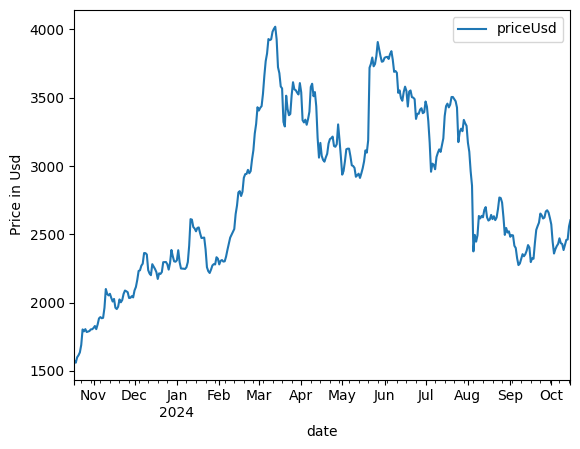

In [134]:
import matplotlib.pyplot as plt
df.plot(x='date',y = 'priceUsd',kind = 'line')
plt.ylabel('Price in Usd')
plt.show()

In [135]:
df.to_csv('ethereum price-usd.csv',index = False)